# Assignment 4

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [3]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

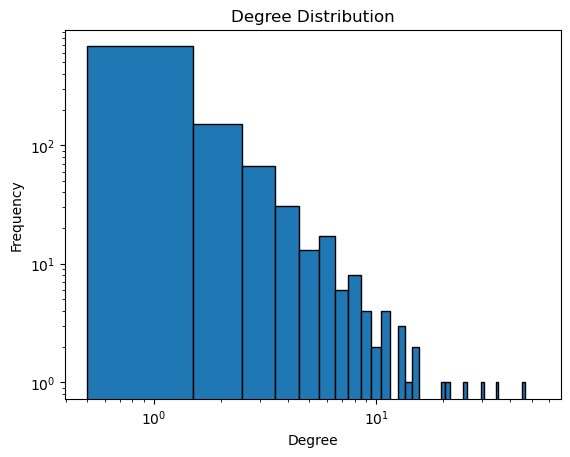

Number of Nodes:1000
Average Clustering Coefficient: 0.0
Average Path Length: 6.530506506506507


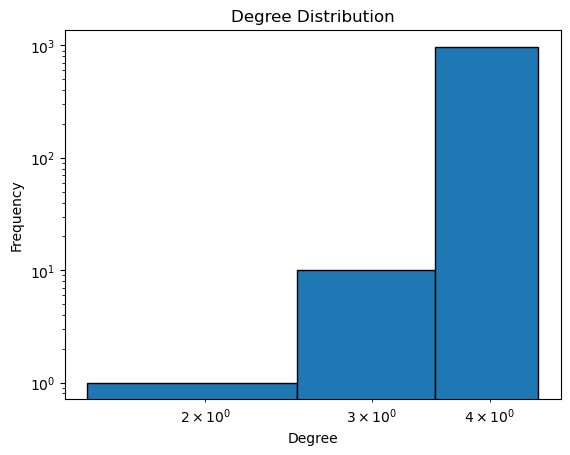

Number of Nodes:1000
Average Clustering Coefficient: 0.49310000000000004
Average Path Length: 43.80284684684685


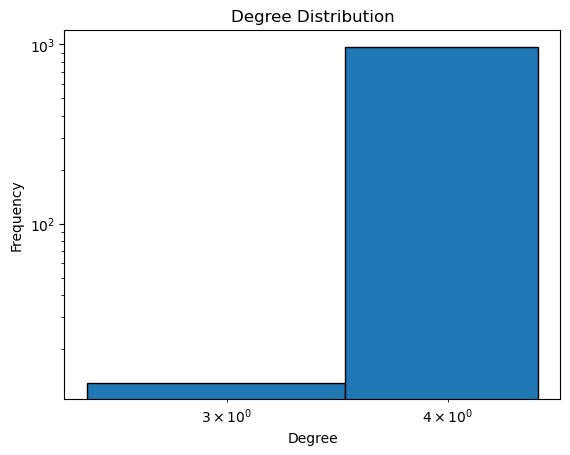

Number of Nodes:1000
Average Clustering Coefficient: 0.4897333333333334
Average Path Length: 39.007695695695695


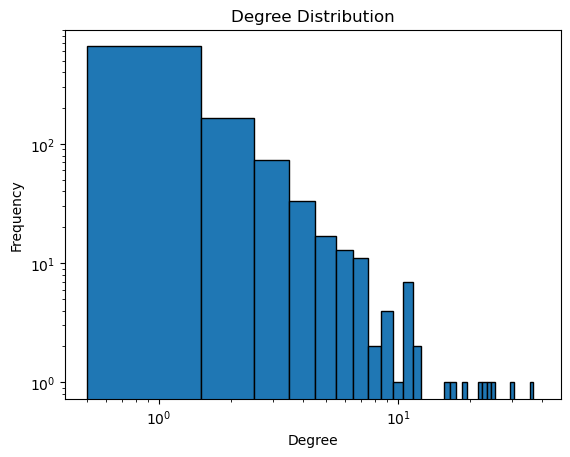

Number of Nodes:1000
Average Clustering Coefficient: 0.0
Average Path Length: 8.158990990990992


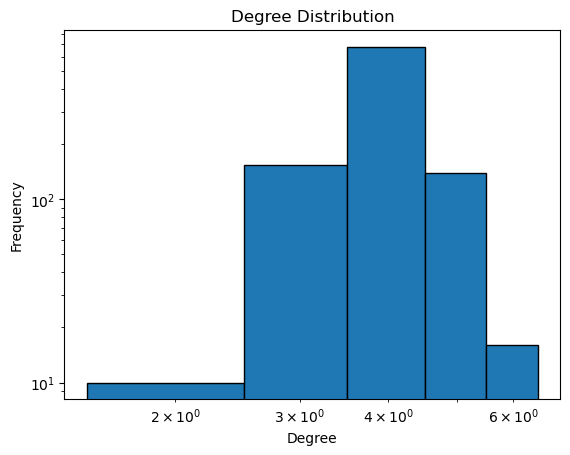

Number of Nodes:1000
Average Clustering Coefficient: 0.36504285714285717
Average Path Length: 8.532046046046046


In [4]:
import matplotlib.pyplot as plt

def analyze_graph(graph):
    # Degree distribution
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1) - 0.5, edgecolor='black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()
    
    print(f"Number of Nodes:{len(graph.nodes())}")
    # Clustering coefficient
    clustering_coeff = nx.average_clustering(graph)
    print(f"Average Clustering Coefficient: {clustering_coeff}")

    # Average path length
    if nx.is_connected(graph):
        avg_path_length = nx.average_shortest_path_length(graph)
        print(f"Average Path Length: {avg_path_length}")
    else:
        print("Graph is not connected; cannot compute average path length.")

analyze_graph(G1)
analyze_graph(G2)
analyze_graph(G3)
analyze_graph(G4)
analyze_graph(G5)

**Resume of the analysis:**
- G1 the degree distribution follows a power-law, the average clustering coefficient is very low and the average path length is relatively 
short compared to the number of nodes.  => Preferential Attachment 
- G2 the degree distribution does not follows a power-law, the average path lenght is short but with a higher clustering coefficient => Small World with low probability of rewiring (`'SW_L'`)
- G3 the degree distribution does not follows a power-law, the average path lenght is short but with a higher clustering coefficient => Small World with low probability of rewiring (`'SW_L'`)
- G4 the degree distribution follows a power-law, the average clustering coefficient is very low and the average path length is relatively 

- G5 the degree distribution does not follows a power-law, the average path lenght is very short ==> Small World with High Probability of Rewiring (SW_H)

In [5]:
def graph_identification():
    # YOUR CODE HERE
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

In [6]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [130]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [9]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [100]:
def salary_predictions():
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    
    # YOUR CODE HERE
    df = pd.DataFrame(G.nodes(data=True), columns=['node', 'data']).set_index('node')
    df['Department'] = df['data'].apply(lambda x : x['Department'])
    df['ManagementSalary'] = df['data'].apply(lambda x : x['ManagementSalary'])
    df.drop('data',axis = 1,inplace = True)
    
    # Creating node based features
    df['clustering'] = pd.Series(nx.clustering(G), index=G.nodes())
    df['degree'] = pd.Series(dict(G.degree()), index=G.nodes())
    df['degree_centrality'] = pd.Series(nx.degree_centrality(G), index=G.nodes())
    df['closeness'] = pd.Series(nx.closeness_centrality(G), index=G.nodes())
    df['betweeness'] = pd.Series(nx.betweenness_centrality(G, normalized=True), index=G.nodes())
    df['pageRank'] = pd.Series(nx.pagerank(G), index=G.nodes())
    df = df.sort_index()
    
    # Train/Test Splits
    features = ['clustering', 'degree', 'degree_centrality', 'closeness', 'betweeness', 'pageRank']

    train_df = df[~pd.isnull(df['ManagementSalary'])]
    test_df = df[pd.isnull(df['ManagementSalary'])]

    X_train = train_df[features]
    y_train = train_df['ManagementSalary']

    X_test = test_df[features]

    # normalize X_train and X_test
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train_scaled, y_train)
    
    # test the trained model
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]
    
    return pd.Series(test_proba, X_test.index)


In [64]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [142]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [144]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    
    # Creating edge based features
    preferential_attachment = list(nx.preferential_attachment(G))
    df_preferential_attachment = pd.DataFrame(preferential_attachment, columns=['node1', 'node2', 'preferential_attachment'])
    df_preferential_attachment['index'] = list(zip(df_preferential_attachment['node1'], df_preferential_attachment['node2']))
    df_preferential_attachment.index = df_preferential_attachment['index']
    df_preferential_attachment.index.name = None
    df_preferential_attachment.drop(columns=['node1', 'node2', 'index'], inplace=True)
    
    for node in G.nodes():
        G.nodes(data=True)[node]['community'] = G.nodes(data=True)[node]['Department']
    
    cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
    cn_soundarajan_hopcroft
    df_cn_soundarajan_hopcroft = pd.DataFrame(cn_soundarajan_hopcroft, columns=['node1', 'node2', 'cn_soundarajan_hopcroft'])
    df_cn_soundarajan_hopcroft['index'] = list(zip(df_cn_soundarajan_hopcroft['node1'], df_cn_soundarajan_hopcroft['node2']))
    df_cn_soundarajan_hopcroft.index = df_cn_soundarajan_hopcroft['index']
    df_cn_soundarajan_hopcroft.index.name = None
    df_cn_soundarajan_hopcroft.drop(columns=['node1', 'node2', 'index'], inplace=True)

    df = df_preferential_attachment.join(df_cn_soundarajan_hopcroft)
    df = df.join(future_connections)
    
    train_df = df[~pd.isnull(df['Future Connection'])]
    test_df = df[pd.isnull(df['Future Connection'])]
    
    features = ['cn_soundarajan_hopcroft', 'preferential_attachment']
    X_train = train_df[features]
    y_train = train_df['Future Connection']
    
    X_test = test_df[features]

    # normalize X_train and X_test
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train_scaled, y_train)
    
    # test the trained model
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]

    return pd.Series(test_proba, X_test.index)

In [146]:
# new_connections_predictions()

(0, 9)          0.072976
(0, 19)         0.081025
(0, 20)         0.343869
(0, 35)         0.000000
(0, 38)         0.000000
                  ...   
(998, 999)      0.014340
(1000, 1002)    0.011128
(1000, 1003)    0.011128
(1000, 1004)    0.011128
(1001, 1002)    0.012676
Length: 122112, dtype: float64

In [145]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
